In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
df=pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [85]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [86]:
df.isna().sum()

text    0
spam    0
dtype: int64

C:\Users\kk061\AppData\Local\Temp\ipykernel_4488\209974371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, palette='viridis')


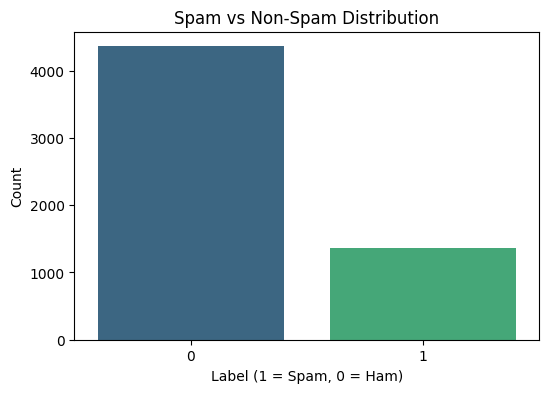

In [87]:
# 1. **Distribution of Spam vs. ham Emails**
plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=df, palette='viridis')
plt.title('Spam vs Non-Spam Distribution')
plt.xlabel('Label (1 = Spam, 0 = Ham)')
plt.ylabel('Count')
plt.show()

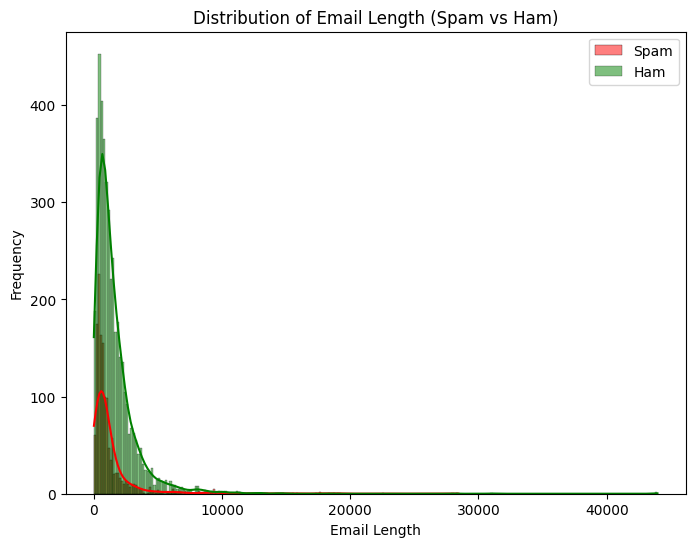

In [88]:
# 2. **Length Distribution of Emails**
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(df[df['spam'] == 1]['text_length'], color='red', label='Spam', kde=True)
sns.histplot(df[df['spam'] == 0]['text_length'], color='green', label='Ham', kde=True)
plt.title('Distribution of Email Length (Spam vs Ham)')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [89]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from joblib import Parallel, delayed


In [90]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text).lower()
    
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    
    return " ".join(words)

df['cleaned_text'] = df['text'].apply(clean_text)

In [91]:
df.head()

,text,spam,text_length,cleaned_text
0,Subject: naturally irresistible your corporate...,1,1484,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,235,subject money get software cds software compat...


In [92]:
import joblib

joblib.dump(model, 'spam_classifier.pkl')
model = joblib.load('spam_classifier.pkl')
new_email = "Free money now!"
new_email_processed = clean_text(new_email)
new_email_vectorized = tfidf.transform([new_email_processed])
prediction = model.predict(new_email_vectorized)
print("Spam" if prediction == 1 else "Not Spam")

Spam


In [93]:
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kk061\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
def get_most_common_words(texts, top_n=20):
    # Tokenize and remove stopwords
    all_words = []
    for text in texts:
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalpha() and word not in stop_words]
        all_words.extend(words)
    
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

In [95]:
spam_texts = df[df['spam'] == 1]['text']
non_spam_texts = df[df['spam'] == 0]['text']


In [96]:
spam_common_words = get_most_common_words(spam_texts)
non_spam_common_words = get_most_common_words(non_spam_texts)

In [97]:
spam_df = pd.DataFrame(spam_common_words, columns=['Word', 'Frequency'])
non_spam_df = pd.DataFrame(non_spam_common_words, columns=['Word', 'Frequency'])

C:\Users\kk061\AppData\Local\Temp\ipykernel_4488\2941011785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=spam_df, palette='Reds')
C:\Users\kk061\AppData\Local\Temp\ipykernel_4488\2941011785.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=non_spam_df, palette='Blues')


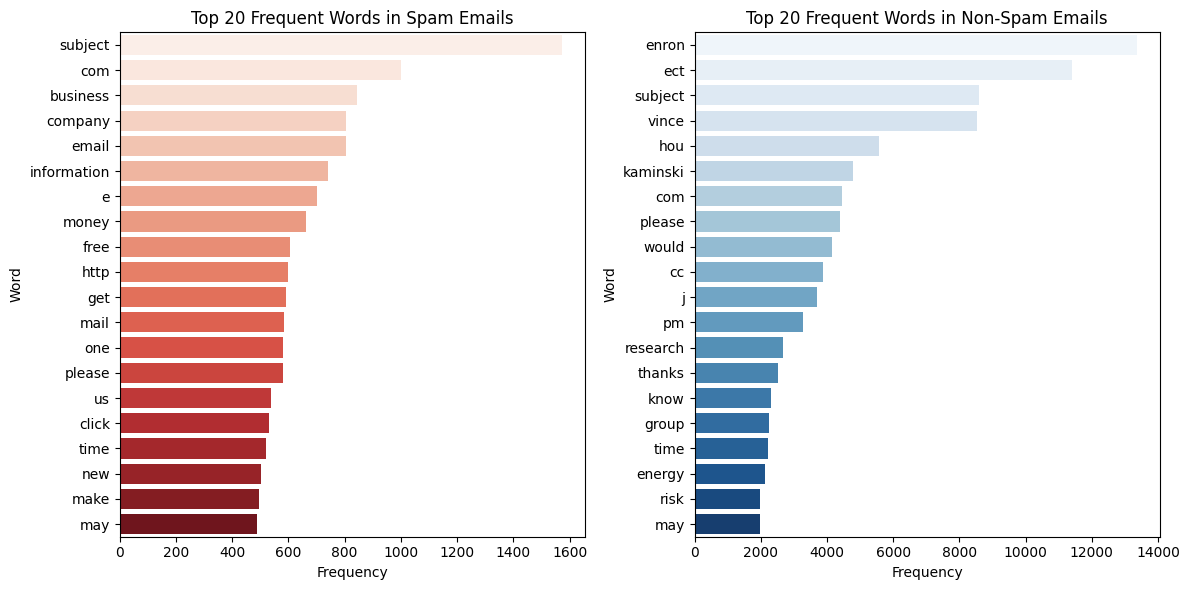

In [98]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=spam_df, palette='Reds')
plt.title('Top 20 Frequent Words in Spam Emails')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=non_spam_df, palette='Blues')
plt.title('Top 20 Frequent Words in Non-Spam Emails')

plt.tight_layout()
plt.show()

In [99]:
spam_text_combined = " ".join(spam_texts)
non_spam_text_combined = " ".join(non_spam_texts)

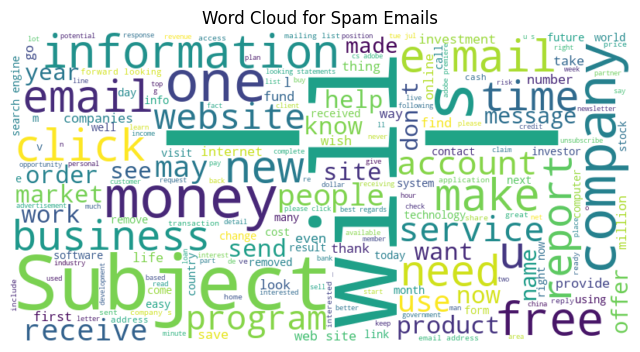

In [100]:
plt.figure(figsize=(8, 8))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text_combined)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')
plt.show()

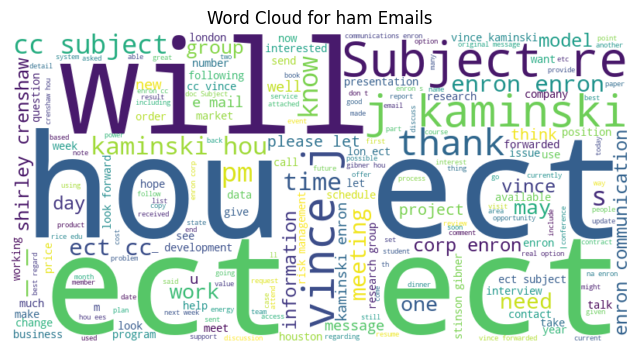

In [101]:
plt.figure(figsize=(8, 8))
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_text_combined)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for ham Emails')
plt.axis('off')
plt.show()


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = tfidf.fit_transform(df['cleaned_text'])
y=df['spam']

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [104]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9744037230948226
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1278
           1       0.98      0.92      0.95       441

    accuracy                           0.97      1719
   macro avg       0.98      0.96      0.97      1719
weighted avg       0.97      0.97      0.97      1719



In [107]:
import joblib

joblib.dump(model, 'spam_classifier.pkl')
model = joblib.load('spam_classifier.pkl')
new_email = "Meeting Notes from Today’s Discussion"
new_email_processed = clean_text(new_email)
new_email_vectorized = tfidf.transform([new_email_processed])
prediction = model.predict(new_email_vectorized)
print("Spam" if prediction == 1 else "Not Spam")

Not Spam
